# Car Price Estimator

In this notebook we will build a regression model for predicting car prices. The dataset used for training and evaluation is obtained from the Kaggle platform, and can be accessed [here](https://www.kaggle.com/datasets/asinow/car-price-dataset).

The model that we will use is the linear regression model. The emphasis of this project is on data visualization and interpretability of the results.

Let's begin:

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import metrics

In [4]:
data = pd.read_csv('car_price_dataset.csv')

Let us see how this dataset is organized:

In [7]:
data.head(10)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
5,Toyota,Camry,2007,2.7,Petrol,Automatic,157889,4,4,7242
6,Honda,Civic,2010,3.4,Electric,Automatic,139584,3,1,11208
7,Kia,Sportage,2001,4.7,Electric,Semi-Automatic,157495,2,2,7950
8,Kia,Sportage,2014,2.6,Hybrid,Manual,98700,3,4,9926
9,Toyota,RAV4,2005,3.1,Petrol,Manual,107724,2,5,6545


In [9]:
print("Number of instances in the dataset is: ", len(data))

Number of instances in the dataset is:  10000


As we can see, the `Brand`, `Model`, `Fuel_Type`, `Transmission` columns consist of text, hence, in order to use the regression model, we need to categorify this data.

## Categorization of text data

In order to get more familiar with the data let us calculate the number of brands and the total number of models:

In [13]:
num_brands = data['Brand'].nunique()
num_models = data['Model'].nunique()

print('The number of car brands is:', num_brands)
print('The total number of models is:', num_models)

The number of car brands is: 10
The total number of models is: 30


In [15]:
num_of_cars_per_model = data['Model'].value_counts()
print(num_of_cars_per_model)

Model
Accord      365
Fiesta      363
Impala      355
5 Series    353
Tiguan      352
Focus       351
Q5          350
A4          350
Elantra     347
Golf        339
A3          338
Optima      336
Civic       336
3 Series    335
Explorer    334
Malibu      333
Tucson      329
Passat      329
Rio         327
Corolla     325
RAV4        324
Camry       321
E-Class     321
Sonata      319
Equinox     315
GLA         315
Sportage    313
X5          311
CR-V        308
C-Class     306
Name: count, dtype: int64


Let us begin with the categorification.

In [18]:
brand_id = {}
id_brand = []
model_id = {}
id_model = []
fuel_id = {}
id_fuel = []
transmission_id = {}
id_transmission = []
brand_count = 0
model_count = 0
fuel_count = 0
transmission_count = 0

data_subset = data.loc[:,['Brand', 'Model', 'Fuel_Type', 'Transmission']]
list_of_cars = list(data[['Brand', 'Model']].itertuples(index=False, name=None))

for row in data_subset.itertuples(index=False):
    brand = row.Brand
    model = row.Model
    fuel = row.Fuel_Type
    transmission = row.Transmission
    if brand_id.get(brand) == None:
        brand_id[brand] = brand_count
        id_brand.append(brand)
        brand_count += 1
    if model_id.get(model) == None:
        model_id[model] = model_count
        id_model.append(model)
        model_count += 1
    if fuel_id.get(fuel) == None:
        fuel_id[fuel] = fuel_count
        id_fuel.append(fuel)
        fuel_count += 1
    if transmission_id.get(transmission) == None:
        transmission_id[transmission] = transmission_count
        id_transmission.append(transmission)
        transmission_count += 1

def get_brand_id( brand ):
    return brand_id[brand]

def get_model_id( model ):
    return model_id[model]

def get_fuel_id( fuel ):
    return fuel_id[fuel]

def get_transmission_id( transmission ):
    return transmission_id[transmission]

data['Brand_ID'] = data['Brand'].apply(get_brand_id)
data['Model_ID'] = data['Model'].apply(get_model_id)
data['Fuel_Type_ID'] = data['Fuel_Type'].apply(get_fuel_id)
data['Transmission_ID'] = data['Transmission'].apply(get_transmission_id)

In [20]:
data.head(10)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,Brand_ID,Model_ID,Fuel_Type_ID,Transmission_ID
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501,0,0,0,0
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092,1,1,1,1
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171,2,2,0,1
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780,3,3,2,0
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867,4,4,1,2
5,Toyota,Camry,2007,2.7,Petrol,Automatic,157889,4,4,7242,5,5,3,1
6,Honda,Civic,2010,3.4,Electric,Automatic,139584,3,1,11208,6,6,2,1
7,Kia,Sportage,2001,4.7,Electric,Semi-Automatic,157495,2,2,7950,0,7,2,2
8,Kia,Sportage,2014,2.6,Hybrid,Manual,98700,3,4,9926,0,7,1,0
9,Toyota,RAV4,2005,3.1,Petrol,Manual,107724,2,5,6545,5,8,3,0


We can also visualize this data:

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Engine_Size'}>,
        <Axes: title={'center': 'Mileage'}>],
       [<Axes: title={'center': 'Doors'}>,
        <Axes: title={'center': 'Owner_Count'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'Brand_ID'}>,
        <Axes: title={'center': 'Model_ID'}>,
        <Axes: title={'center': 'Fuel_Type_ID'}>],
       [<Axes: title={'center': 'Transmission_ID'}>, <Axes: >, <Axes: >]],
      dtype=object)

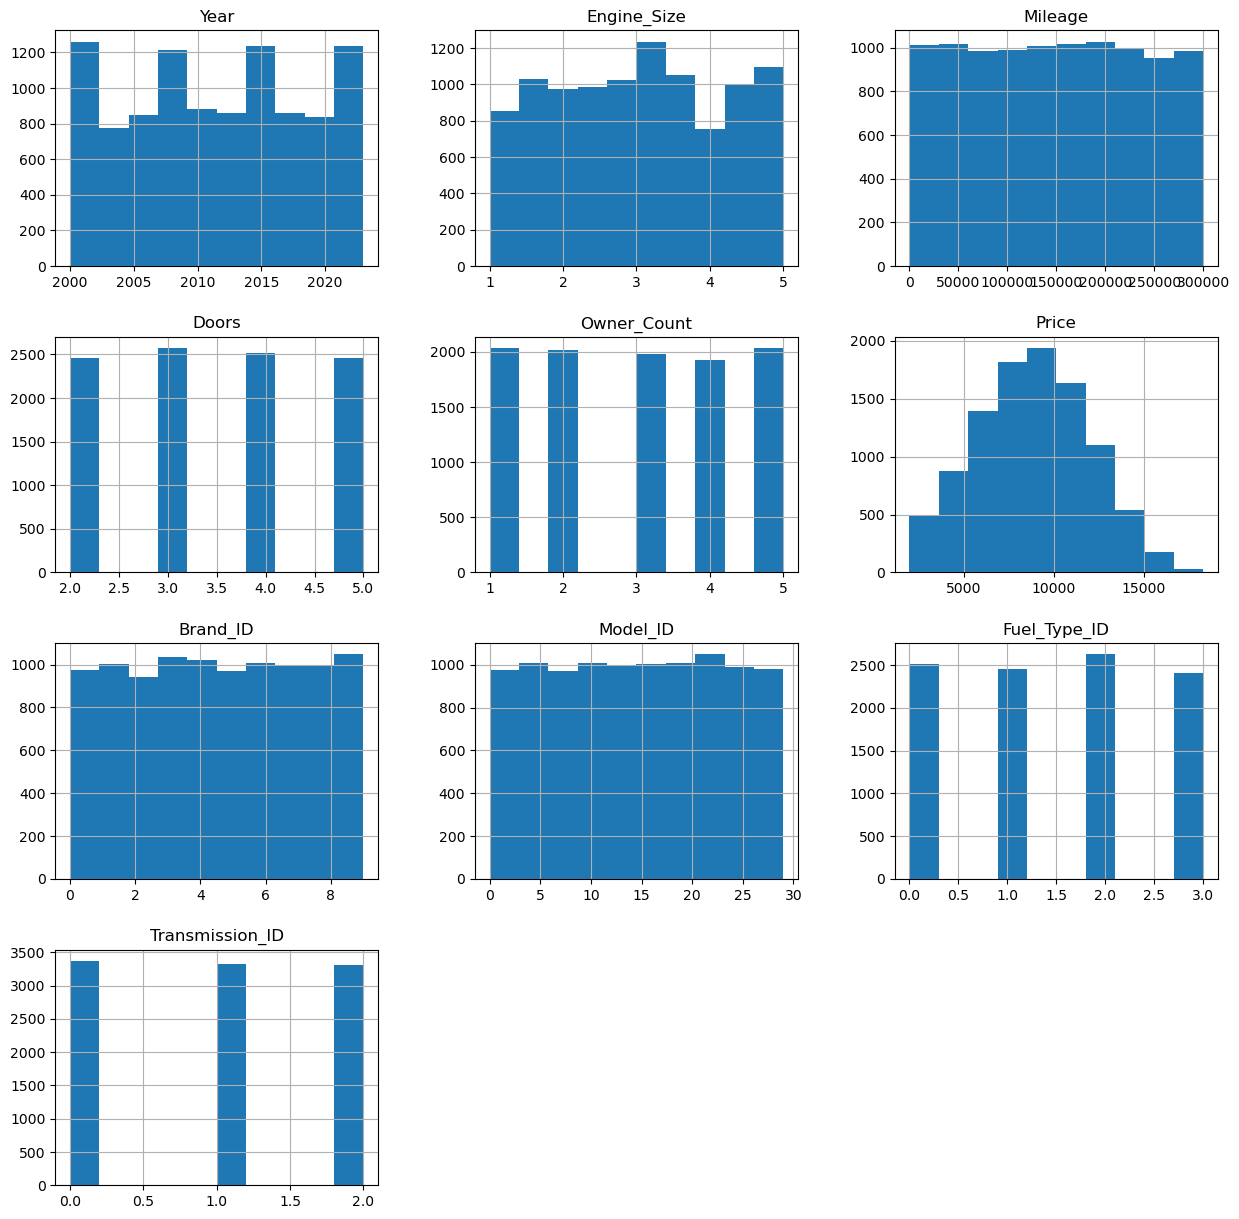

In [23]:
data.hist(figsize = [15, 15])

As we can see, each car is depicted with 10 features, out of which, we are most interested in the price.

## Data Selection and Preprocessing

In [27]:
y = data['Price']
x = data.drop(columns = ['Price', 'Brand', 'Model', 'Fuel_Type', 'Transmission'])

In [29]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 25)

In [31]:
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Model training

In [34]:
model1 = linear_model.LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [36]:
column_names = x.keys().tolist()
for feature, coef in zip(column_names, model1.coef_.ravel()):
    print(feature, coef)
print(model1.intercept_)

Year 2056.5201562759403
Engine_Size 1141.521838256496
Mileage -1718.4676027578403
Doors -14.362537966429034
Owner_Count 20.514312484077678
Brand_ID 10.91112903035849
Model_ID -4.374686914242959
Fuel_Type_ID 131.21273905230908
Transmission_ID -1.6402815122132972
8871.851874999988


## Evaluation

In [39]:
y_predicted = model1.predict(x_test)

mse = metrics.mean_squared_error(y_test, y_predicted)
r2score = metrics.r2_score(y_test, y_predicted)

In [41]:
print('Mean square error:',mse)
print('R2 score:', r2score)

Mean square error: 1219149.5955088665
R2 score: 0.875918102250288


We see that the *R2* score is relatively good i.e. the model explains 87.6% of variance. In practice, this is considered to be a good model.

## Feature Analysis

Let us calculate the correlation between car features and car prices:

In [46]:
correlation_coefs = []

for feature in column_names:
    corr_coef = np.corrcoef(x[feature].values, y)[0, 1]
    correlation_coefs.append(corr_coef)
    print(feature, corr_coef)

Year 0.6630358185023508
Engine_Size 0.3574034753558664
Mileage -0.5512271827629015
Doors 0.0005114988177188558
Owner_Count 0.002656399406563445
Brand_ID -0.02336524980533333
Model_ID 0.003191841390375511
Fuel_Type_ID 0.03390034152637736
Transmission_ID -0.011730209586111867


[]

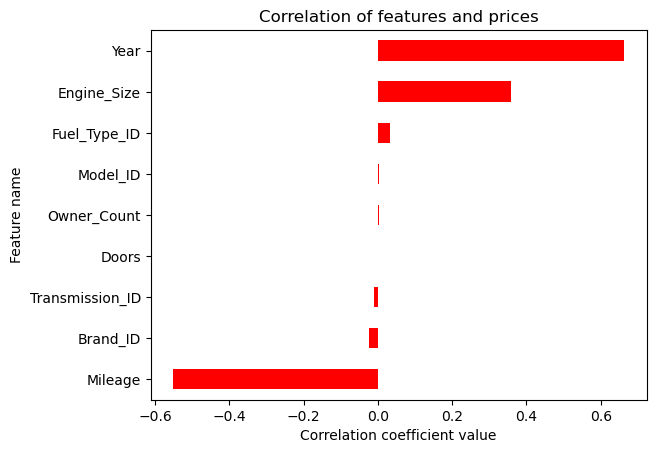

In [48]:
coefs_for_plot = pd.Series(correlation_coefs).sort_values()
coefs_for_plot.plot(kind="barh", color='red')

label_list = [column_names[i] for i in coefs_for_plot.index.tolist()]

plt.title("Correlation of features and prices")
plt.ylabel('Feature name')
plt.xlabel('Correlation coefficient value')
plt.yticks(ticks = np.arange(len(column_names)),
           labels = label_list)
plt.plot()

As expected `Brand_ID`, `Model_ID`, `Fuel_Type_ID` and `Transmission_ID` do not correlate well with the price since we have obtained those values by simply categorifying the data. On the other hand, we see that `Doors` and `Owner_Count` do not play a significant role in determining the price, while `Year`, `Mileage` and `Engine_Size` do. Additionally, we see that `Mileage` is negatively correlated with the price, meaning that the greater the mileage is, the lower the price will be, which can be deduced from real life experience as well.

Additionally, we can see how features correlate to each other.

In [52]:
x.corr()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Brand_ID,Model_ID,Fuel_Type_ID,Transmission_ID
Year,1.000000,-0.001306,-0.002476,0.014867,0.000116,-0.015241,0.001921,-0.005390,-0.002728
Engine_Size,-0.001306,1.000000,0.015135,-0.009844,0.007122,-0.019240,-0.001495,-0.003310,-0.006457
Mileage,-0.002476,0.015135,1.000000,0.007879,0.006287,0.012271,-0.005319,0.005715,0.012795
Doors,0.014867,-0.009844,0.007879,1.000000,-0.005431,-0.002426,-0.005252,0.010120,0.003452
Owner_Count,0.000116,0.007122,0.006287,-0.005431,1.000000,-0.017239,-0.013620,0.000563,0.008294
Brand_ID,-0.015241,-0.019240,0.012271,-0.002426,-0.017239,1.000000,0.295824,0.011738,0.013858
Model_ID,0.001921,-0.001495,-0.005319,-0.005252,-0.013620,0.295824,1.000000,0.012817,0.000086
Fuel_Type_ID,-0.005390,-0.003310,0.005715,0.010120,0.000563,0.011738,0.012817,1.000000,-0.003183
Transmission_ID,-0.002728,-0.006457,0.012795,0.003452,0.008294,0.013858,0.000086,-0.003183,1.000000


This can also be seen graphically

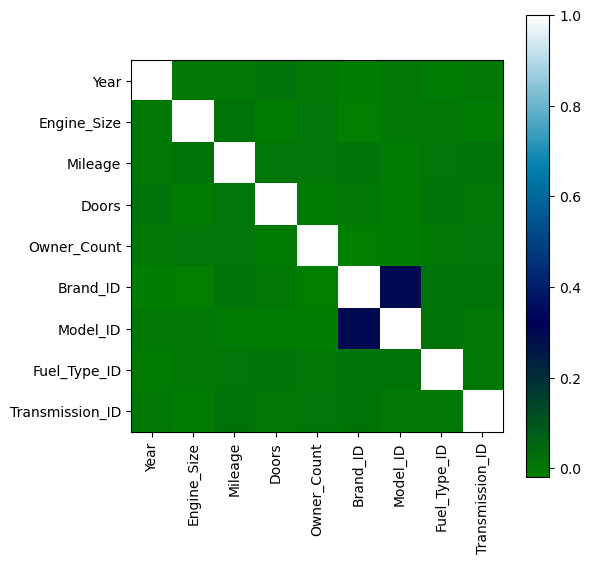

In [55]:
plt.figure(figsize=(6, 6))
plt.xticks(range(len(column_names)), column_names, rotation='vertical')
plt.yticks(range(len(column_names)), column_names)
plt.imshow(x.corr(), cmap='ocean')
plt.colorbar()
plt.show()

One can observe that there is slight correlation between `Brand_ID` and `Model_ID` which is to be expected. What is more surprising is that correlation between other features is relatively low. One would expect a noticeable correlation between `Year` and `Mileage` for example, but the data shows that it is not the case.